# Importing all the libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Reading the file

In [37]:
fruits=pd.read_table(r"C:\Users\nini\Downloads\fruit_data_with_colors.txt")

fruits.head()


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


# analys data

In [38]:
fruits.shape

(59, 7)

In [39]:
#No null in this data
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.3+ KB


In [40]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
f1=dict(zip(fruits["fruit_label"].unique(),fruits["fruit_name"].unique()))
f1

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [41]:
#checking how many unique fruit names are present in the dataset
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


Thus we have 4 classes. Either the fruit is lemon or aplle or orange or mandarina.
#so it is a classification problem!

In [42]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [43]:
fd=fruits.groupby('fruit_name')
mn=fd.mean()
mn

,fruit_label,mass,width,height,color_score
fruit_name,,,,,
apple,1.0,165.052632,7.457895,7.342105,0.783684
lemon,4.0,150.000000,6.512500,8.856250,0.718125
mandarin,2.0,81.200000,5.940000,4.380000,0.796000
orange,3.0,193.789474,7.557895,7.936842,0.771053


#height and width are very similar,but because mass and color score we have to do Standardising

# Plotting

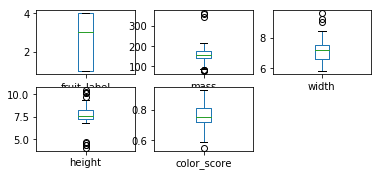

In [44]:
fruits.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

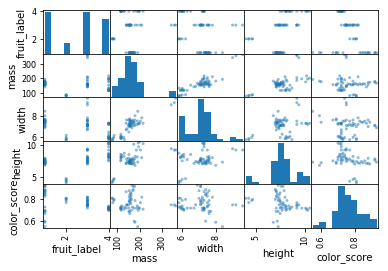

In [45]:
scatter_matrix(fruits)
plt.show()

we have corrolation between mass and width.
we have corrolation between mass and length.

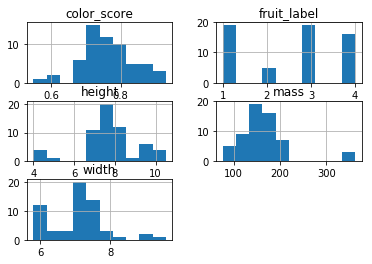

In [46]:
fruits.hist()
plt.show()


there are more sampels of 1 and 3 then the other

Text(0,0.5,'mass')

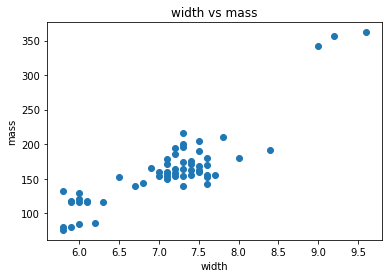

In [47]:
plt.scatter(fruits['width'],fruits['mass'])
plt.title('width vs mass')
plt.xlabel("width")
plt.ylabel("mass")



Text(0,0.5,'height')

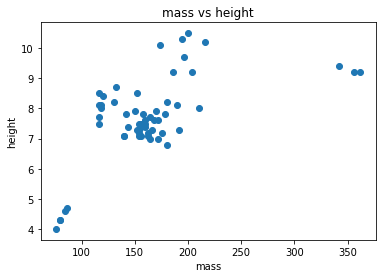

In [48]:
plt.scatter(fruits['mass'],fruits['height'])
plt.title('mass vs height')
plt.xlabel("mass")
plt.ylabel("height")


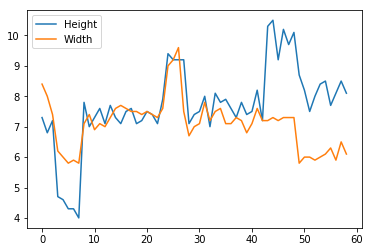

In [49]:
plt.plot(fruits['height'],label='Height')
plt.plot(fruits['width'],label='Width')

plt.legend()

width has good balance, but Height doesn't.

# Separating features and label

In [50]:
from sklearn.model_selection import train_test_split

X=fruits[['mass','width','height','color_score']]
Y=fruits['fruit_label']


Standardising the data

In [51]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 0.52944179,  1.59869024, -0.29139659, -2.79359541],
       [ 0.30946246,  1.10485399, -0.66192242, -2.26868417],
       [ 0.23613601,  0.36409961, -0.36550175, -2.13745636],
       [-1.41370901, -1.11740915, -2.21813091,  0.48709984],
       [-1.45037224, -1.36432727, -2.29223608,  0.35587203],
       [-1.52369868, -1.6112454 , -2.51455158,  0.09341641],
       [-1.52369868, -1.48778634, -2.51455158,  0.61832765],
       [-1.59702513, -1.6112454 , -2.73686708,  0.61832765],
       [ 0.27279923, -0.00627758,  0.07912925,  2.06183356],
       [ 0.16280957,  0.36409961, -0.51371209,  1.66815013],
       [ 0.0528199 , -0.25319571, -0.29139659,  2.19306137],
       [ 0.16280957, -0.00627758, -0.06908109,  2.06183356],
       [-0.16715944, -0.12973664, -0.43960692,  1.53692232],
       [ 0.01615667,  0.24064055,  0.00502408, -0.82517826],
       [-0.20382266,  0.61101774, -0.29139659, -0.95640607],
       [-0.13049622,  0.7344768 , -0.43960692, -0.95640607],
       [-0.13049622,  0.

 Create a Validation Dataset

In [52]:
# Split-out validation dataset
from sklearn import model_selection

validation_size = 0.20
seed = 7
#The specific random seed does not matter
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

scoring = 'accuracy'



We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage . We will be using the scoring variable when we run build and evaluate each model next.

# Build Models

Let’s evaluate 3 different algorithms:

Logistic Regression (LR)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).



In [53]:

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Select Best Model

In [54]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.700000 (0.154919)
KNN: 0.910000 (0.142829)
CART: 0.890000 (0.142829)


In this case, we can see that it looks like knn has the largest estimated accuracy score.

# Make Predictions

In [55]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))


0.9166666666666666


# cross_val_score

In [56]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scors=cross_val_score(knn,X,Y,cv=10,scoring="accuracy")
scors

C:\Users\nini\Desktop\New folder\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


array([1. , 1. , 1. , 1. , 1. , 1. , 0.8, 1. , 1. , 1. ])

In [57]:
print (scors.mean())

0.9800000000000001


k checking

In [66]:
k_range=range(1,20)
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,Y,cv=10,scoring="accuracy")
    k_scores.append(scores.mean())
    
print (k_scores)

C:\Users\nini\Desktop\New folder\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\nini\Desktop\New folder\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\nini\Desktop\New folder\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\nini\Desktop\New folder\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 

[0.9547619047619047, 0.9547619047619047, 0.9800000000000001, 0.9857142857142858, 0.9800000000000001, 0.9657142857142856, 0.9028571428571428, 0.9571428571428571, 0.9204761904761906, 0.8728571428571428, 0.8895238095238096, 0.7704761904761905, 0.7409523809523809, 0.6704761904761904, 0.7123809523809523, 0.6838095238095238, 0.6328571428571428, 0.6066666666666666, 0.4671428571428571]


C:\Users\nini\Desktop\New folder\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\nini\Desktop\New folder\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\nini\Desktop\New folder\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Text(0,0.5,' cross val accuracy')

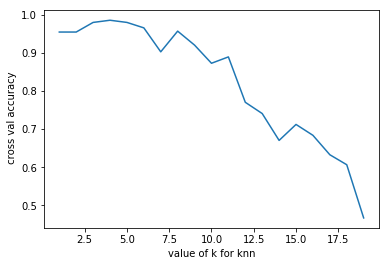

In [71]:
plt.plot(k_range,k_scores)
plt.xlabel("value of k for knn")
plt.ylabel(" cross val accuracy")


The best k is somwhere between 2.5 and 5

# Tuned parameters

In [77]:
from sklearn.model_selection import GridSearchCV
k_r=range(1,20)
param_grid=dict(n_neighbors=k_r)
grid= GridSearchCV(knn,param_grid,cv=10,scoring="accuracy")
grid.fit(X,Y)

C:\Users\nini\Desktop\New folder\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [78]:
grid.grid_scores_

C:\Users\nini\Desktop\New folder\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.94915, std: 0.06938, params: {'n_neighbors': 1},
 mean: 0.94915, std: 0.06938, params: {'n_neighbors': 2},
 mean: 0.98305, std: 0.06000, params: {'n_neighbors': 3},
 mean: 0.98305, std: 0.04286, params: {'n_neighbors': 4},
 mean: 0.98305, std: 0.06000, params: {'n_neighbors': 5},
 mean: 0.96610, std: 0.06975, params: {'n_neighbors': 6},
 mean: 0.89831, std: 0.10396, params: {'n_neighbors': 7},
 mean: 0.94915, std: 0.09147, params: {'n_neighbors': 8},
 mean: 0.91525, std: 0.10324, params: {'n_neighbors': 9},
 mean: 0.88136, std: 0.11819, params: {'n_neighbors': 10},
 mean: 0.88136, std: 0.13868, params: {'n_neighbors': 11},
 mean: 0.76271, std: 0.13579, params: {'n_neighbors': 12},
 mean: 0.71186, std: 0.16588, params: {'n_neighbors': 13},
 mean: 0.64407, std: 0.25007, params: {'n_neighbors': 14},
 mean: 0.67797, std: 0.22015, params: {'n_neighbors': 15},
 mean: 0.64407, std: 0.25272, params: {'n_neighbors': 16},
 mean: 0.59322, std: 0.25555, params: {'n_neighbors': 17},
 mean:

In [84]:
grid_mean_scores=[result.mean_validation_score for result in grid.grid_scores_]
grid_mean_scores

C:\Users\nini\Desktop\New folder\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[0.9491525423728814,
 0.9491525423728814,
 0.9830508474576272,
 0.9830508474576272,
 0.9830508474576272,
 0.9661016949152542,
 0.8983050847457628,
 0.9491525423728814,
 0.9152542372881356,
 0.8813559322033898,
 0.8813559322033898,
 0.7627118644067796,
 0.711864406779661,
 0.6440677966101694,
 0.6779661016949152,
 0.6440677966101694,
 0.5932203389830508,
 0.559322033898305,
 0.423728813559322]

Text(0,0.5,' cross val accuracy')

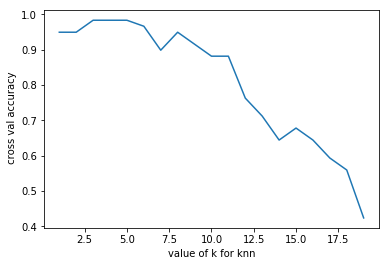

In [83]:
plt.plot(k_range,grid_mean_scores)
plt.xlabel("value of k for knn")
plt.ylabel(" cross val accuracy")


In [86]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9830508474576272
{'n_neighbors': 3}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
